## Measurement platforms in Africa

In [214]:
import requests
import json
from pandas.io.json import json_normalize 
import time
from datetime import date
import pandas as pd
import _thread
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
import numpy as np


%matplotlib inline

#set ggplot style
plt.style.use('default')


ATLAS_PROBES_URI = "https://stat.ripe.net/data/atlas-probes/data.json?resource="
ATLAS_DEPLOYMENT_URI = "https://stat.ripe.net/data/atlas-probe-deployment/data.json?resource="

ccs = [
'EG', 'BJ', 'CI', 'CV', 'GH', 'GM', 'GN', 'GW', 'AO', 'CF', 'CG', 'CM', 'GA', 'GQ', 'TD', 'BI', 'DJ', 'ER', 'ET', 'KM', 'BW', 'MA', 'SD', 'TN', 'LR', 'ML', 'MR', 'NE', 'NG', 'SL', 'SN', 'TG', 'ST', 'KE', 'MG', 'MU', 'MW', 'MZ', 'RE', 'RW', 'SC', 'SO', 'UG', 'LS', 'NA', 'SZ', 'ZA', 'DZ', 'EH', 'LY', 'BF', 'SH', 'CD', 'TZ', 'YT', 'ZM', 'ZW']

### RIPE Atlas
We want to understand the evolution of the deployment of RIPE Atlas probes in Africa over the years.

In [ ]:
# def getDeployment(cc):
    
#     test_url = ATLAS_DEPLOYMENT_URI + cc
    
#     df = pd.DataFrame()
    
#     try:
#         r = requests.get(test_url)
#     except requests.exceptions.RequestException as e:
#         return "Request FAILED"
    
#     try:
#         data = json.loads(r.text)['data']['deployments'][0]['deployment']
#         df = json_normalize(data)
#         df['cc'] = cc
#     except KeyError as e:
#         pass
    
#     return df


# f= open('data/africa_probes_deployment.csv', 'a')
    
# for cc in ccs:
#     print(cc)
#     df = getDeployment(cc)
#     df.to_csv(f, header=False)

# f.close()

In [ ]:
# def getProbes(cc):
    
#     test_url = ATLAS_PROBES_URI + cc
    
#     df = pd.DataFrame()
    
#     try:
#         r = requests.get(test_url)
#     except requests.exceptions.RequestException as e:
#         return "Request FAILED"
    
#     try:
#         data = json.loads(r.text)['data']['probes']
#         df = json_normalize(data)
#         df['cc'] = cc
#     except KeyError as e:
#         pass
    
#     return df

# f= open('data/africa_probes.csv', 'a')

# for cc in ccs:
#     print(cc)
#     df = getProbes(cc)
#     try:
#         df = df['asn_v4'].astype('int')
#         df = df['asn_v6'].astype('int')
#     except ValueError as e:
#         pass
#     except KeyError as e:
#         pass
    
#     df.to_csv(f, header=False)

# f.close()

In [216]:
# #getProbes('MU').to_csv('data/mu.csv', header=True)
# df1 = pd.read_csv('data/africa_probes.csv')
# try:
#     df1 = df1['asn_v4'].astype('int64')
#     df1 = df1['asn_v6'].astype('int64')
# except ValueError as e:
#     pass
# except KeyError as e:
#     pass
    
# df1.to_csv('data/africa_probes2.csv', header=True)

In [183]:
df = pd.read_csv('data/africa_probes_deployment.csv')
df = df.iloc[:,[0,1,2,3,4]]

In [184]:
df_agg = df.groupby(['date'])['neverseen', 'abandoned','connected','disconnected'].sum().reset_index()

We group the rows by date and sum the statuses before plotting

Let's split and re-merge the dataframes

In [185]:
df_neverseen = df.iloc[:,[0,4]]
df_neverseen = df_neverseen.assign(type = 'neverseen')
df_neverseen.columns = {'date','amount','type'}

df_abandoned = df.iloc[:,[0,1]]
df_abandoned = df_abandoned.assign(type = 'abandoned')
df_abandoned.columns = {'date','amount','type'}

df_connected = df.iloc[:,[0,2]]
df_connected = df_connected.assign(type = 'connected')
df_connected.columns = {'date','amount','type'}

df_disconnected = df.iloc[:,[0,3]]
df_disconnected = df_disconnected.assign(type = 'disconnected')
df_disconnected.columns = {'date','amount','type'}

df_agg2 = pd.concat([df_neverseen, df_abandoned, df_connected, df_disconnected])

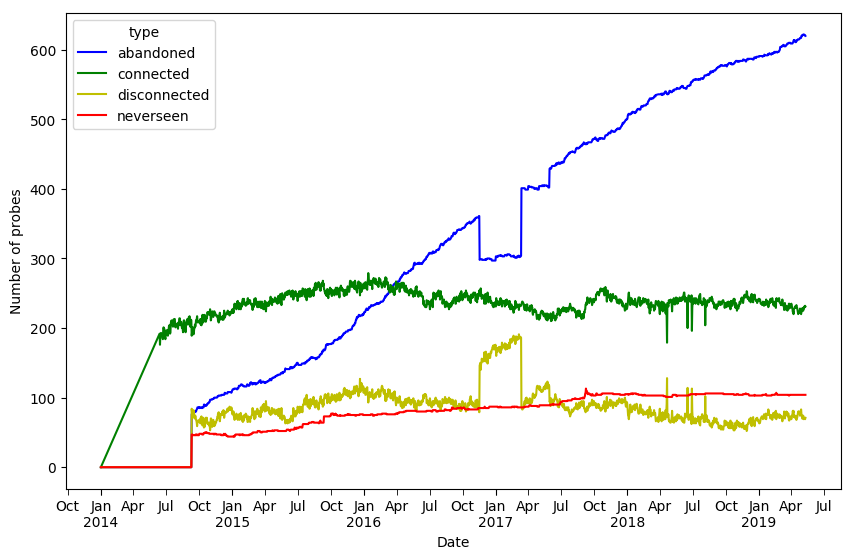

In [217]:
# plot data
fig, ax = plt.subplots(figsize=(10,7))
# use unstack()
df_agg2.date = pd.to_datetime(df_agg2['date'], format='%Y-%m-%d')

styles = ['b','g','y', 'r']

df_agg2.groupby(['date','type']).sum()['amount'].unstack().plot(style=styles, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of probes')

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
ax.tick_params(axis="x", which="both", length=4)

plt.show()


## Geographic distribution

### Connected probes

In [245]:
import pandas as pd
import plotly.plotly as py

df = pd.read_csv('data/africa_probes.csv')

data = dict(
        type = 'scattergeo',
        locationmode = 'country names', 
        mode = 'markers'
        )

data_connected = data.copy()
data_connected['lon'] = df[df['status'] == 1 ]['longitude']
data_connected['lat'] = df[df['status'] == 1 ]['latitude']
data_connected['marker'] = dict(color = 'green')
data_connected['name'] = 'Connected'

layout = dict(
        #title = 'Probes distribution April 2019',
        showlegend = False,
        geo = dict(
            scope='africa',
            projection=dict( type='country names' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)",
        ),
    )

fig = dict(data=[data_connected], layout=layout)
py.iplot( fig, validate=False, filename='d3-bubble-map-populations')

### Disconnected probes

In [246]:
import pandas as pd
import plotly.plotly as py

df = pd.read_csv('data/africa_probes.csv')

data = dict(
        type = 'scattergeo',
        locationmode = 'country names', 
        mode = 'markers'
        )

data_disconnected = data.copy()
data_disconnected['lon'] = df[df['status']  == 2 ]['longitude']
data_disconnected['lat'] = df[df['status']  == 2 ]['latitude']
data_disconnected['marker'] = dict(color = 'red')
data_disconnected['name'] = 'Disconnected'

layout = dict(
        #title = 'Disconnected Probes',
        showlegend = False,
        geo = dict(
            scope='africa',
            projection=dict( type='country names' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict(data=[data_disconnected], layout=layout)
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

### Abandoned probes

In [247]:
import pandas as pd
import plotly.plotly as py

df = pd.read_csv('data/africa_probes.csv')

data = dict(
        type = 'scattergeo',
        locationmode = 'country names', 
        mode = 'markers'
        )

data_abandoned = data.copy()
data_abandoned['lon'] = df[df['status']  == 3 ]['longitude']
data_abandoned['lat'] = df[df['status']  == 3 ]['latitude']
data_abandoned['marker'] = dict(color = 'orange')
data_abandoned['name'] = 'Abandoned'

layout = dict(
        #title = 'Disconnected',
        showlegend = False,
        geo = dict(
            scope='africa',
            projection=dict( type='country names' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict(data=[data_abandoned], layout=layout)
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

In [248]:
import pandas as pd
import plotly.plotly as py

df = pd.read_csv('data/africa_probes.csv')

data = dict(
        type = 'scattergeo',
        locationmode = 'country names', 
        mode = 'markers'
        )

data_neverseen = data.copy()
data_neverseen['lon'] = df[df['status']  == 0 ]['longitude']
data_neverseen['lat'] = df[df['status']  == 0 ]['latitude']
data_neverseen['marker'] = dict(color = 'black')
data_neverseen['name'] = 'Never seen'

layout = dict(
        #title = 'Never seen',
        showlegend = False,
        geo = dict(
            scope='africa',
            projection=dict( type='country names' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict(data=[data_neverseen], layout=layout)
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

### Distribution by country

In [434]:
df = pd.read_csv('data/africa_probes.csv')
df = df.iloc[:,[6,15,17,20]]
df_agg = df.groupby(['cc','status_name']).size().reset_index(name='counts')
df = df_agg.pivot(index='cc', columns='status_name',values='counts')
df.to_csv('data/cc_distribution.csv')
df = pd.read_csv('data/cc_distribution.csv')

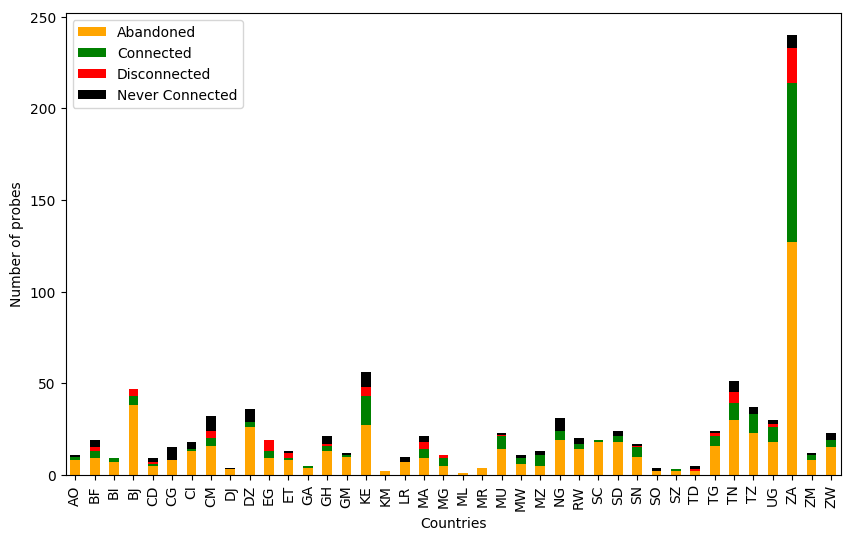

In [439]:
df.plot.bar(x='cc', stacked=True, figsize=(10,6), color=('orange', 'green', 'red', 'black'))
plt.ylabel('Number of probes')
plt.xlabel('Countries')
#plt.savefig("../data/plots/percentage_website_local_vs_remote_ordered.pdf", bbox="tight")
plt.show()

## AS Coverage

In [540]:
df_allocated_afrinic = pd.read_csv('http://ftp.afrinic.net/pub/stats/afrinic/delegated-afrinic-extended-latest', sep='|', skiprows=5, names=['rir', 'cc', 'type', 'value', 'flag', 'allocdate', 'status','opaqueid'])
df_allocated_afrinic = df_allocated_afrinic.loc[(df_allocated_afrinic.type=='asn') & (df_allocated_afrinic.status=='allocated')]

In [541]:
df_probes_asn = pd.read_csv('data/africa_probes.csv')

### Global coverage i.e. % of ASNs are covered in Africa

In [542]:
asn_v4 = len(df_probes_asn.loc[(df_probes_asn.status==1)].asn_v4.dropna().unique())
print(asn_v4)
asn_v6 = len(df_probes_asn.loc[df_probes_asn.status==1].asn_v6.dropna().unique())
print(asn_v6)


126
39


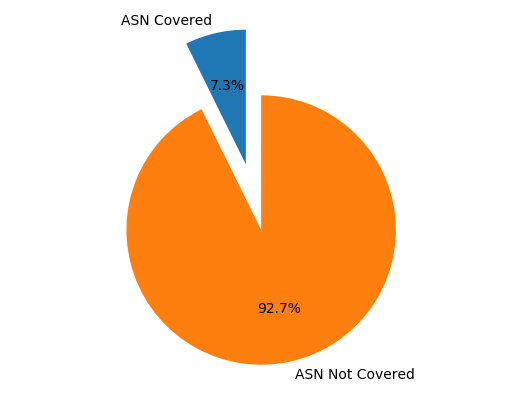

In [543]:
labels = 'ASN Covered', 'ASN Not Covered'
sizes = [126, 1601]
explode = (0, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### ASN Coverage by country

In [544]:
def getTotalAllocated(cc, df):
    return len(df.loc[df.cc==cc].values)

def getCountASN(cc, df):
    return df.iloc[:,[2,4]].dropna().groupby(['country_code']).asn_v4.nunique()[cc]

In [545]:
#Get the set of probes, group by cc and get the number of ASNs

df = df_probes_asn.iloc[:,[2,20]].drop_duplicates().dropna().groupby(['cc']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

In [546]:
df['total_allocated'] = df.apply(lambda x: getTotalAllocated(x['cc'], df_allocated_afrinic), axis=1)

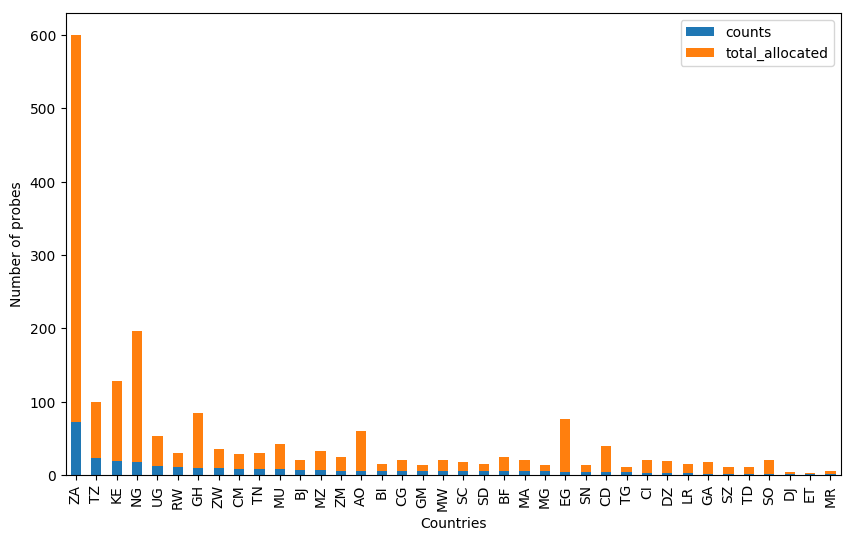

In [548]:
df.plot.bar(x='cc', figsize=(10,6))
plt.ylabel('Number of probes')
plt.xlabel('Countries')
#plt.savefig("../data/plots/percentage_website_local_vs_remote_ordered.pdf", bbox="tight")
plt.show()